<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Problem 1] Hypothetical function**
Implement the linear regression assumption function given by the following formula: A method template is provided.


$x$ : feature vector

$\theta$ : parameter vector

$n$ : number of features

$x_j$ : j-th feature

$\theta_j$ : jth parameter (weight)

The number of features $n$ should be an implementation that can handle any value.

In addition, it is as follows when expressed in vector format.

In [1]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

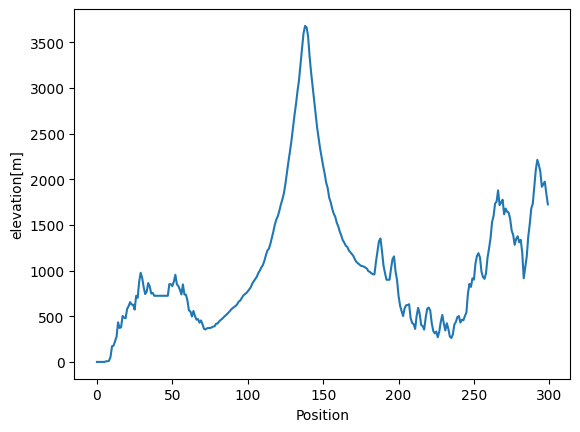

In [2]:
import matplotlib.pyplot as plt

position = fuji[:,0]
elevation = fuji[:,3]

fig , ax = plt.subplots()
ax.plot(position,elevation)
ax.set_xlabel('Position')
ax.set_ylabel('elevation[m]')
plt.show()


# **[Question 2] The steepest descent method**
Implement learning by the steepest descent method. Add the parameter update formula method _gradient_descent represented by the formula below and
call it from the fit method.

$\alpha$ : learning rate

$i$ : sample index

$j$ : feature index

In [3]:
def fuji_gradient(position, elevation,current_point):
  '''
  Calculate the gradient using the amount of change.
  parametres
  -------------
  definition x1,x2,y1,y2
  calculate amount of change in y
  calculate amount of change in x

  return
  --------------
  gradient
  '''
  x1 = position[current_point]
  x2 = position[current_point-1]
  y1 = elevation[current_point]
  y2 = elevation[current_point-1]

  y_change = y1-y2
  x_change = x1-x2

  gradient = y_change/x_change

  return gradient

# **[Question 3] Presumption**
Please implement a mechanism to estimate. Add the predict method included in the ScratchLinearRegression class skeleton.

The output of the hypothesis function $h_\theta(x)$ is the estimation result.

In [4]:
def destination_point(current_point,slope_current_point, Alpha=0.2):
  '''
  calculate the destination point
  destination_point = current_point - 'Alpha' * the slope of the current point
  return: int
  -----------
  destination_point
  '''
  destination_point = int(current_point - (Alpha*slope_current_point))

  return destination_point

# **[Question 4] Mean squared error**
Create a function for the mean square error (MSE) to be used as an index value for linear regression.

Since the mean squared error function can be used for regression problems in general, please create it as a separate function, not as a method of the ScratchLinearRegression class. I have a template ready.

The mean squared error is given by the following formula:

$m$ : number of input data

$h_\theta()$ : hypothetical function

$x^{(i)}$ : feature vector of i-th sample

$y^{(i)}$ : correct value of i-th sample

As the objective function (loss function) for the steepest descent method, divide this by 2 and use it. (issues 5 and 9)

# **[Question 5] Objective function**
Implement the linear regression objective function (loss function) expressed by the following formula . And be sure to record this in self.loss, .self.val_loss

The objective function (loss function) $J(\theta)$ is the following formula:


$m$ : number of input data

$h_\theta()$ : hypothetical function

$x^{(i)}$ : feature vector of i-th sample

$y^{(i)}$ : correct value of i-th sample

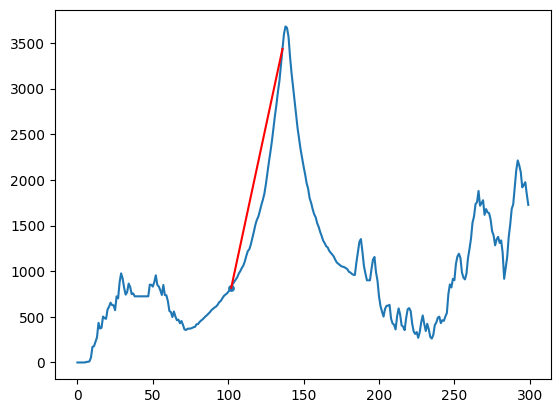

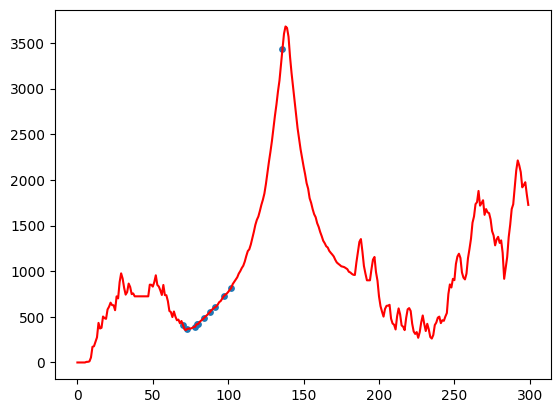

In [6]:
def compute_path(elevation, current_point, position, alpha=0.2):
    '''
    Calculate go down the mountain
    Parameters
    -------------------------------
    current_position: int
       current_position
     learning_rate: floating point
        descending changes
     Returns
     --------------------------------
     destination_point: int
        calculated destination point
    '''
    grad = elevation[current_point]-elevation[current_point-1]
    update_y = [elevation[current_point]]
    update_point = [current_point]
    fig, ax = plt.subplots()
    ax.plot(position, elevation)

    while grad > 0:
        grad = fuji_gradient(position, elevation, current_point)
        current_point = destination_point(current_point,grad,alpha)

        update_y.append(elevation[current_point])
        update_point.append(current_point)

        ax.scatter(current_point, elevation[current_point], s=15)
        ax.plot([update_point[-1],update_point[-2]], [update_y[-1],update_y[-2]], color = 'red')
        plt.pause(1)
        plt.show()
    return update_y, update_point

path = []
path_index = []
current_point = int(position[136])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()

# **[Question 6] Learning and Estimation**
Learn and infer a scratch implementation against the data from the House Prices competition that you prepared in the Machine Learning Scratch Introductory Sprint.

Compare it with the scikit-learn implementation to see if it works.

# **[Question 7] Learning curve plot**
Write a function that displays the learning curve and run it. Look at the graph and see if the loss is dropping properly.

The linear regression class template records losses in self.loss and self.val_loss, so please use them for input.

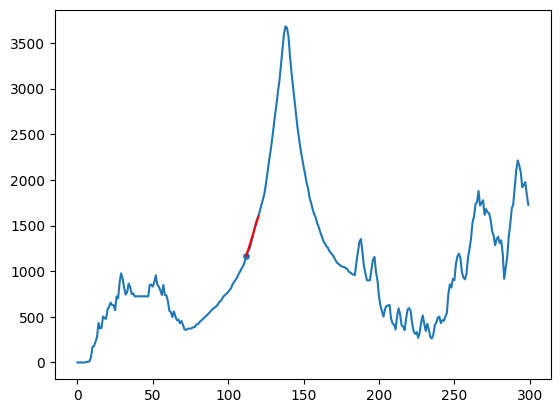

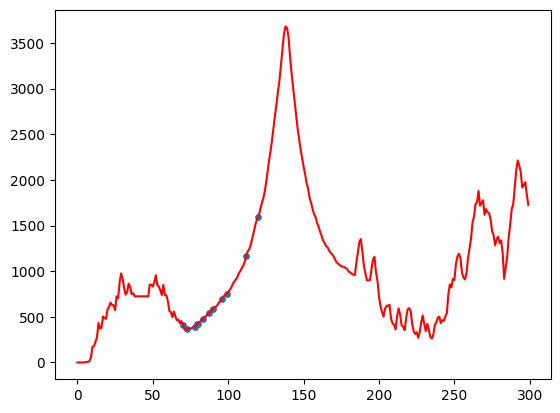

In [7]:
path = []
path_index = []
current_point = int(position[120])
alpha = 0.2

path, path_index = compute_path(elevation, current_point, position, alpha)
fig, ax = plt.subplots()
ax.plot(position, elevation, color='red')
ax.scatter(path_index, path, s=15)
plt.show()